# Loan Prediction Model


In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [2]:
train = pd.read_csv("loan_data/train_ctrUa4K.csv")
test = pd.read_csv("loan_data/test_lAUu6dG.csv")

In [3]:
train_original = train.copy()
test_original = test.copy()

### Understanding the data

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
train.shape,test.shape

((614, 13), (367, 12))

### Univariate Analysis

#### Analyzing the target variable

In [9]:
# Frequency table

train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

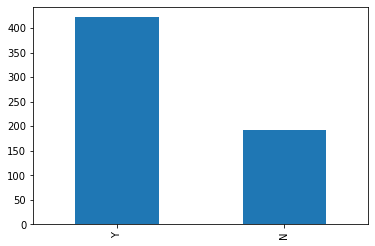

In [11]:
# Bar Plot

ax_ = train['Loan_Status'].value_counts()
ax_.plot.bar()

# The loan for 422 (around 69%) was approved out of 614 people.

#### Analyzing the other categorical variables

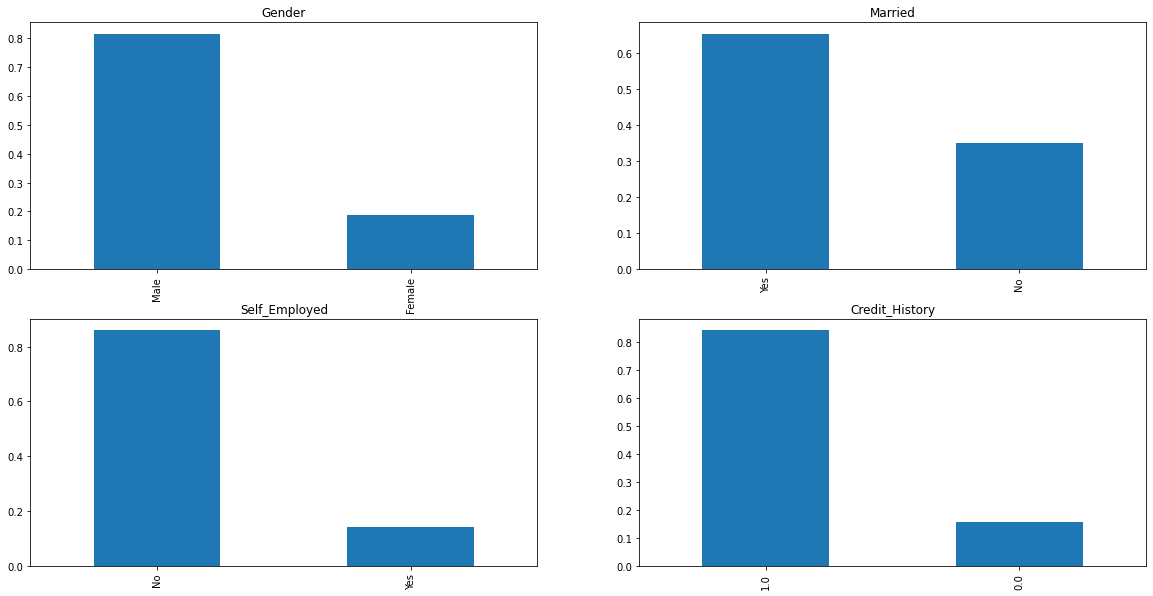

In [12]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize = True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize = True).plot.bar(figsize=(20,10),title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize = True).plot.bar(figsize=(20,10),title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize = True).plot.bar(figsize=(20,10),title='Credit_History')
plt.show()

# We can say that 
# 80% of the applicant is male.
# Around 65% of the applicants are married.
# Around 15 % are self-employed
# Around 85% have credit-history of 1.0(i.e., they have repayed their previous debts).

####  Analyzing the ordinal variables

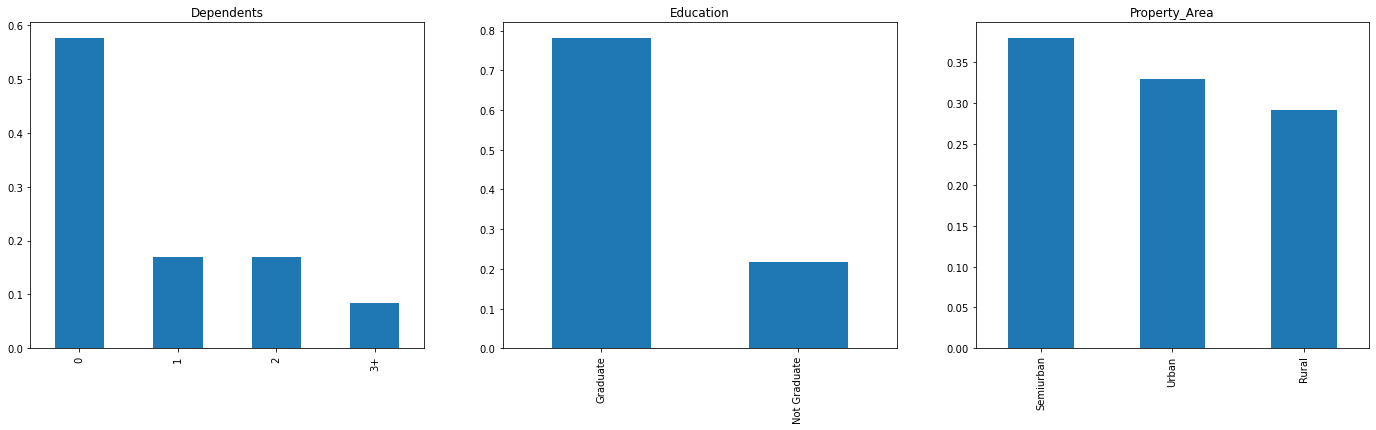

In [13]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize = True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize = True).plot.bar(title='Property_Area')
plt.show()

# We can observe that
# Most of the applicants have no dependents.
# Around 80% of applicants are Graduates.
# Around 40% of application apply for home loan in semi urban areas.

####  Analyzing the numerical variables

<AxesSubplot:title={'center':'Box plot for Applicant Income'}>

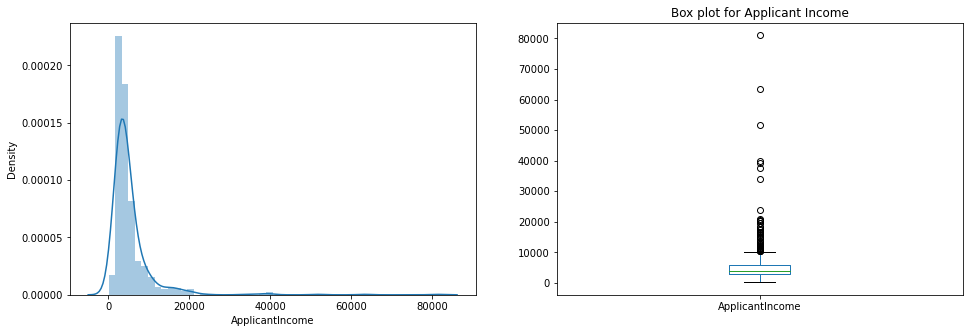

In [14]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5),title="Box plot for Applicant Income")

# From the graph, we can say that the graph is not normally distributed, and it is skewed towards left.
# The boxplot confirms the presence of outliers/extreme values.
# we cn seggregate this applicant Income by education.

Text(0.5, 0.98, '')

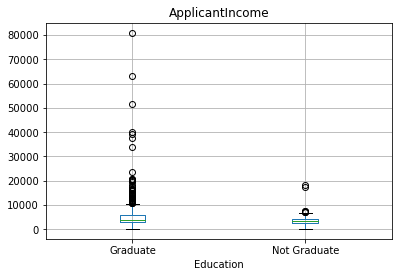

In [21]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

# we can see that there are higher number of graduates with high income and they appear to be the outliers.


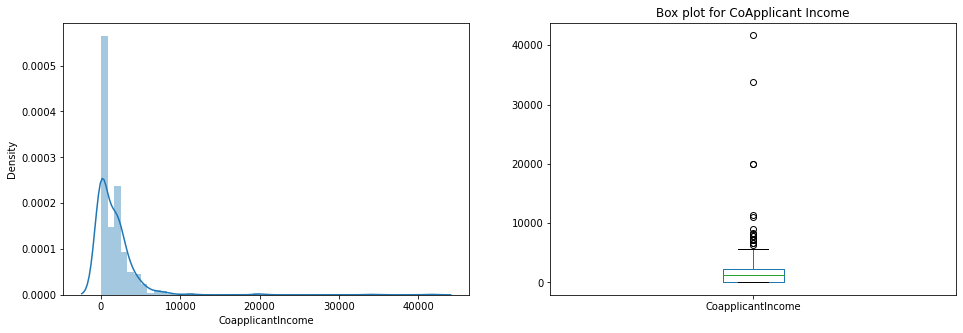

In [24]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5),title="Box plot for CoApplicant Income")
plt.show()

# We see similar distribution as in Applicants income.
# Majority of the income is from 0 to 5000
# we see a lot of outliers and it is not normally distributed.

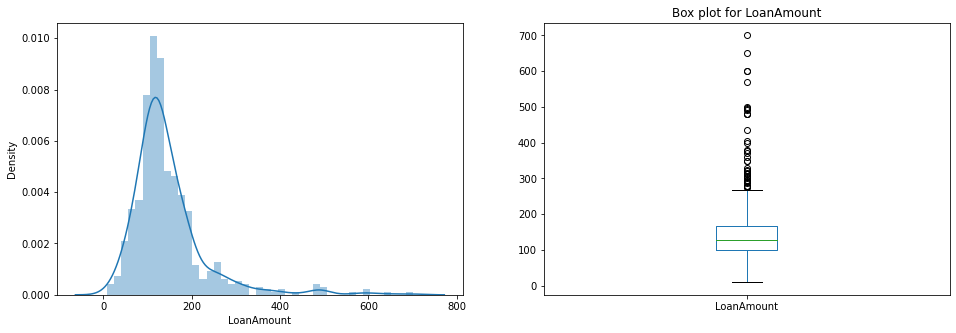

In [25]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5),title="Box plot for LoanAmount")
plt.show()

# We see a lot of outliers but the distribution is fairly normal

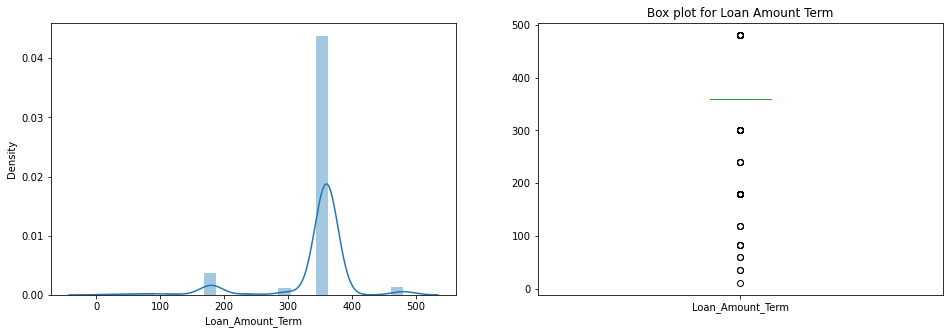

In [26]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Loan_Amount_Term']);
plt.subplot(122)
train['Loan_Amount_Term'].plot.box(figsize=(16,5),title="Box plot for Loan Amount Term")
plt.show()
 
# This looks discrete so we consider Loan Amount.
# Now, we proceed to Bivariate analysis to see which feature is related with Loan Status.

### Bivariate Analysis

#### Categorical Independent Variables Vs Target Variable 

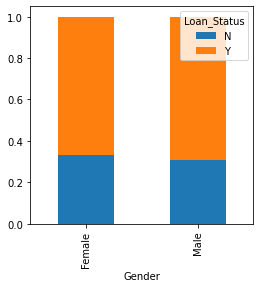

In [31]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
#Gender
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()

# It can be inferred that loan approval for male and female are more or less same.

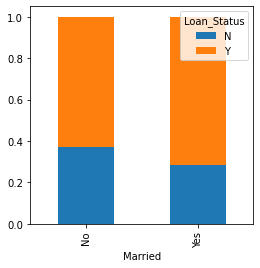

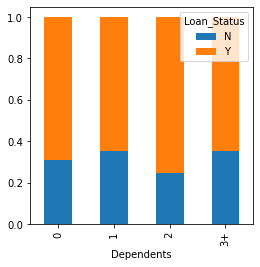

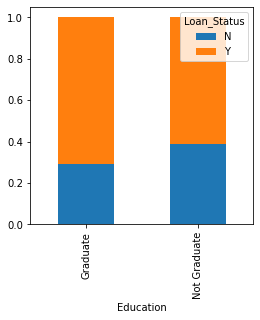

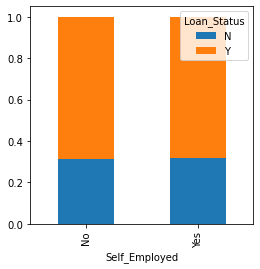

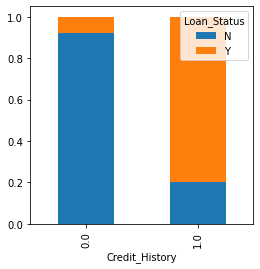

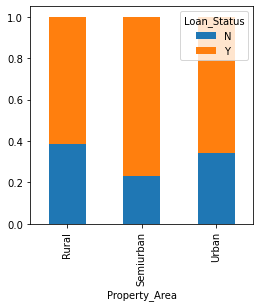

In [34]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()

Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()

Education = pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()

Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()

Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()

Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()

# Proportion of married applicants is higher for approved loans
# Distribution of applicants with 1 or 3+ dependents have higher chances of loan approval.
# Graduated people have higher chances of loan approval.
# Self Employment have no proper inference for loan approval.
# Applicants with credit history 1.0 is more likely to have loan approved.
# Proportion of loans getting approved in semi urban is higher as compared to rural and urban areas.

#### Numerical Independent Variables Vs Target Variable

<AxesSubplot:xlabel='Loan_Status'>

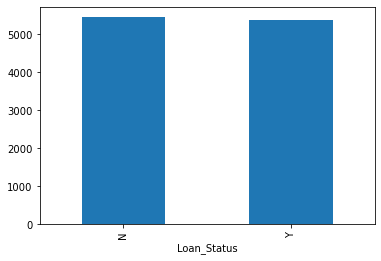

In [35]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

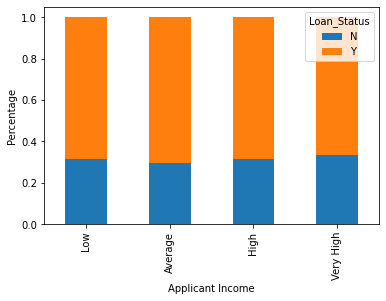

In [41]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low','Average','High','Very High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Applicant Income')
p = plt.ylabel('Percentage')

# It can be inferred that Applicant Income does not affect the chances of loan approval.
# It contradicts our hypotheses that if high income of applicant implies the higher chances of loan approval.

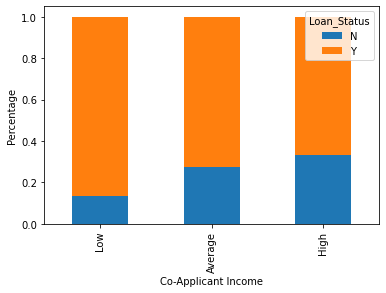

In [42]:
bins = [0, 1000, 3000, 42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Co-Applicant Income')
p = plt.ylabel('Percentage')


# It shows that if Co-Applicant income is less, then the loan approval is high.
# But this does not make sense.
# The Possible reason could be that most of the applicants don't have any coapplicant income and 
# hence loan approval is not dependent on it.
# So we can combine Applicant's Income and CoApplicant's Income to visualize the combined effect of income on loan approval.


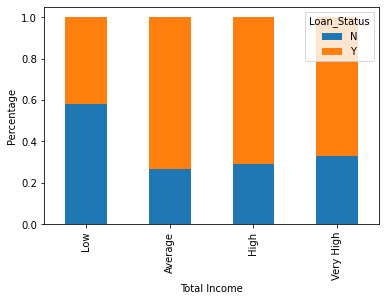

In [44]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low','Average','High','Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total Income')
p = plt.ylabel('Percentage')

# Proportion of loans getting approved is low when Total_Income is low compared with average, high or very-high.

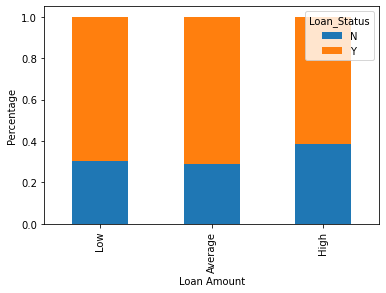

In [45]:
bins = [0, 100, 200, 700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Loan Amount')
p = plt.ylabel('Percentage')

# We can infer that if the loan amount is low or average, the possibilty of loan approval is high.
# This supports our hypotheses that if loan amount is low, then chances of loan approval is more.

In [49]:
train = train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'], axis=1)

train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

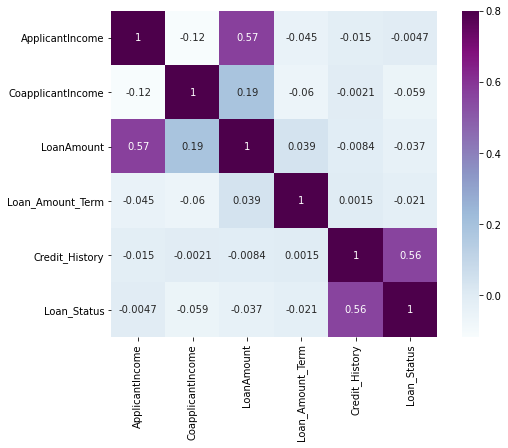

In [51]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

## Missing Values and Outliers

#### Missing Values

In [53]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [54]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [55]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [56]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [57]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [58]:
train.isnull().sum()

# No missing values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [59]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)

test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

#### Outlier Values

<AxesSubplot:>

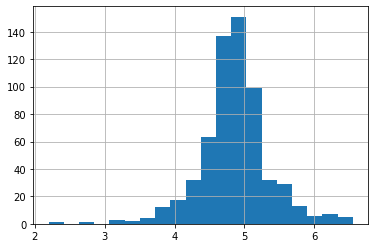

In [60]:
# we remove the outliers in loan amount
# One way to remove the skewness is doing log transformation.
# It does not affect smaller values, but reduces large values.
# So, we get a distribution similar to normal distribution.

train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

## Building Model

In [61]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

In [64]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [65]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [67]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [74]:
pred_cv = model.predict(x_cv)

In [72]:
accuracy_score(y_cv,pred_cv)

0.8162162162162162

## Predicting Test Dataset

In [75]:
pred_test = model.predict(test)

### Stratified k-fold cross validation

In [80]:
from sklearn.model_selection import StratifiedKFold

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]         
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('Accuracy Score: ',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]




1 of kfold 5
Accuracy Score:  0.8048780487804879

2 of kfold 5
Accuracy Score:  0.8373983739837398

3 of kfold 5
Accuracy Score:  0.7804878048780488

4 of kfold 5
Accuracy Score:  0.7886178861788617

5 of kfold 5
Accuracy Score:  0.7950819672131147


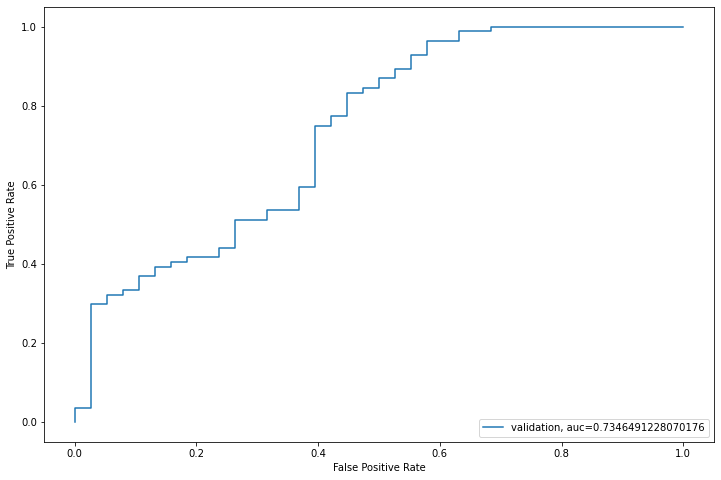

In [81]:
# ROC curve

from sklearn import metrics
fpr,tpr,_ = metrics.roc_curve(yvl,pred)
auc = metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()